In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pmdarima.arima import ADFTest

# Forecasting de variables representativas 

In [39]:
#Importamos las bases de datos
inf = pd.read_excel('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Inflación.xls')
mig_net = pd.read_csv('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Migraciones_netas.csv')
pib = pd.read_excel('C:/Users/julin/Documents/Git_Hub/Portafolio/migraciones/Datasets/Pib.xls')

In [47]:
# elegimos los países a estudio y transponemos la gráfica
inf

,Date,Bahamas,Belice,Bolivia,Brasil,Canada,Chile,Colombia,Costa Rica,República Dominicana,...,Guatemala,Honduras,Haiti,Jamaica,Mexico,Peru,Paraguay,El Salvador,Uruguay,Estados Unidos
0,1981,11.114498,11.224490,32.133601,101.725073,12.471612,19.686833,27.453762,37.056342,7.514639,...,11.433068,9.405691,10.858333,12.739718,27.933763,75.433269,12.974697,14.797152,34.045336,10.334715
1,1982,6.012621,6.839033,123.535719,100.543359,10.768972,9.941027,24.720988,90.121333,7.646243,...,0.307386,8.982622,7.359242,6.545408,58.913420,64.448159,5.120065,11.728887,18.992501,6.131427
2,1983,4.000000,4.996097,275.586284,135.027682,5.863588,27.257195,19.597317,32.623708,5.628623,...,4.538678,8.252812,10.243663,11.582111,101.874938,111.150635,13.433756,13.314318,49.197380,3.212435
3,1984,3.966346,3.382900,1281.349942,192.121733,4.304778,19.860206,16.161617,11.947427,20.151678,...,3.406750,4.726368,6.402032,27.814769,65.448807,110.208520,20.311463,11.507170,55.304424,4.300535
4,1985,4.605010,6.237166,11749.639632,225.989665,3.962031,30.703499,24.090174,15.057420,45.336176,...,18.686791,3.362675,10.648839,25.673101,57.748448,163.399505,25.210716,22.328375,72.222564,3.545644
5,1986,5.433782,0.799771,276.335968,147.142826,4.194786,19.476838,18.842463,11.835062,7.638973,...,36.931121,4.352724,3.279927,15.105375,86.233317,77.921026,31.742597,31.935016,76.380636,1.898048
6,1987,5.756464,2.011901,14.578698,228.336163,4.356109,19.880846,23.302028,16.842420,13.550724,...,12.323213,2.487154,-11.449465,6.652448,131.827384,85.822306,21.810274,24.864500,63.566662,3.664563
7,1988,4.402412,3.138889,16.002091,629.114509,4.028234,14.684351,28.108397,20.832533,43.863832,...,10.832704,4.491258,4.105468,8.266766,114.162259,667.019329,22.594257,19.761162,62.191956,4.077741
8,1989,5.387658,2.127660,15.173468,1430.723725,4.983622,17.027937,25.867548,16.509809,40.657916,...,11.387132,9.850409,6.923905,14.329539,20.007877,3398.679010,26.422127,17.634080,80.447437,4.827003
9,1990,4.669319,3.059072,17.118775,2947.732772,4.780477,26.036481,29.152025,19.039753,50.462479,...,41.221867,23.322566,21.276032,21.960175,26.651673,7481.663611,37.259956,23.999165,112.525906,5.397956


### Caso México primera parte

Se utilizará a México como serie de tiempo piloto para producir e implementar el modelo, posteriormente se plantea formular una función que automatice este proceso en todos los países de estudio. Se propone un modelo de regresión múltiple que toma como variables predictoras la inflación y el PIB para predecir la migración neta.


In [51]:
paises_X = pd.merge(inf, pib, on='Date',suffixes=('_inf','_pib'),how='outer')

In [62]:
Mexico_Y = mig_net[['Date','Mexico']]
Mexico_Y = Mexico_Y.set_index('Date')
Mexico_X=paises_X[['Date','Mexico_inf','Mexico_pib']]
Mexico_X=Mexico_X.set_index('Date')

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(Mexico_X,Mexico_Y,test_size=0.2,random_state=8,shuffle=False)

In [64]:
lr = LinearRegression()

In [69]:
lr.fit(X_train, Y_train)

LinearRegression()

In [74]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[-1292.06576729    31.8418154 ]]
Valor de la intersección o coeficiente "b":
[-500327.05987421]


In [76]:
print('Precisión del modelo:')
print(lr.score(X_train,Y_train))

Precisión del modelo:
0.6652604329571364


Obtenemos un modelo con una presición del 66%, aceptable tomando en cuenta lo contingente de las variables X

### Caso México Segunda parte

En la segunda parte predictiva del modelo necesitamos los valores de la inflación y el pib futuros, específicamente: 2022, 2023 y 2024. Datos que, debido a su proximidad, se encuentran fuera de los censos actuales. La solución propuesta es modelar las series de tiempo del Pib y la inflación bajo un modelo autorregresivo integrado de medias móviles (arima).  

In [81]:
#En primer lugar obtenemos nuestras series de tiempo
Mexico_inf = inf[['Date','Mexico']]
Mexico_inf = Mexico_inf.set_index('Date')
Mexico_pib = pib[['Date','Mexico']]
Mexico_pib = Mexico_pib.set_index('Date')

<AxesSubplot:xlabel='Date'>

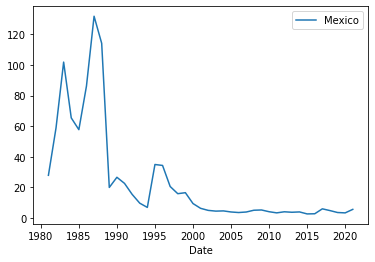

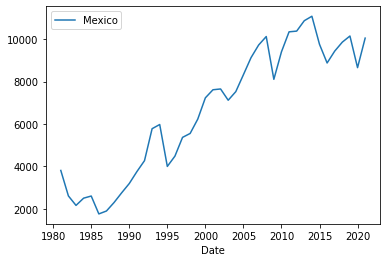

In [83]:
Mexico_inf.plot()
Mexico_pib.plot()

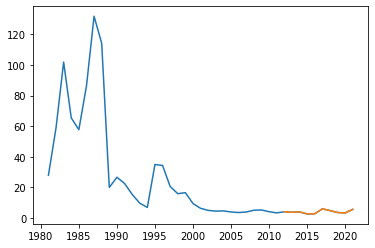

In [92]:
#No encontramos un componente estacional en nuestros datos, por lo que se descarta el posible uso de un modelo SARIMA. 
#Dividimos los datos en Train y Test
train_inf = Mexico_inf[:85]
test_inf = Mexico_inf[-10:]
plt.plot(train_inf)
plt.plot(test_inf)